<a href="https://colab.research.google.com/github/groom115/Titanic-kaggle-project/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all libraries**

In [ ]:
#Importing all lib
import pandas as pd
import numpy as np
from collections import Counter
import missingno
#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

**Read and Import data**

In [ ]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")
ss=pd.read_csv("/content/gender_submission.csv")



In [ ]:
print(train.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


**Exploring Data analysis**

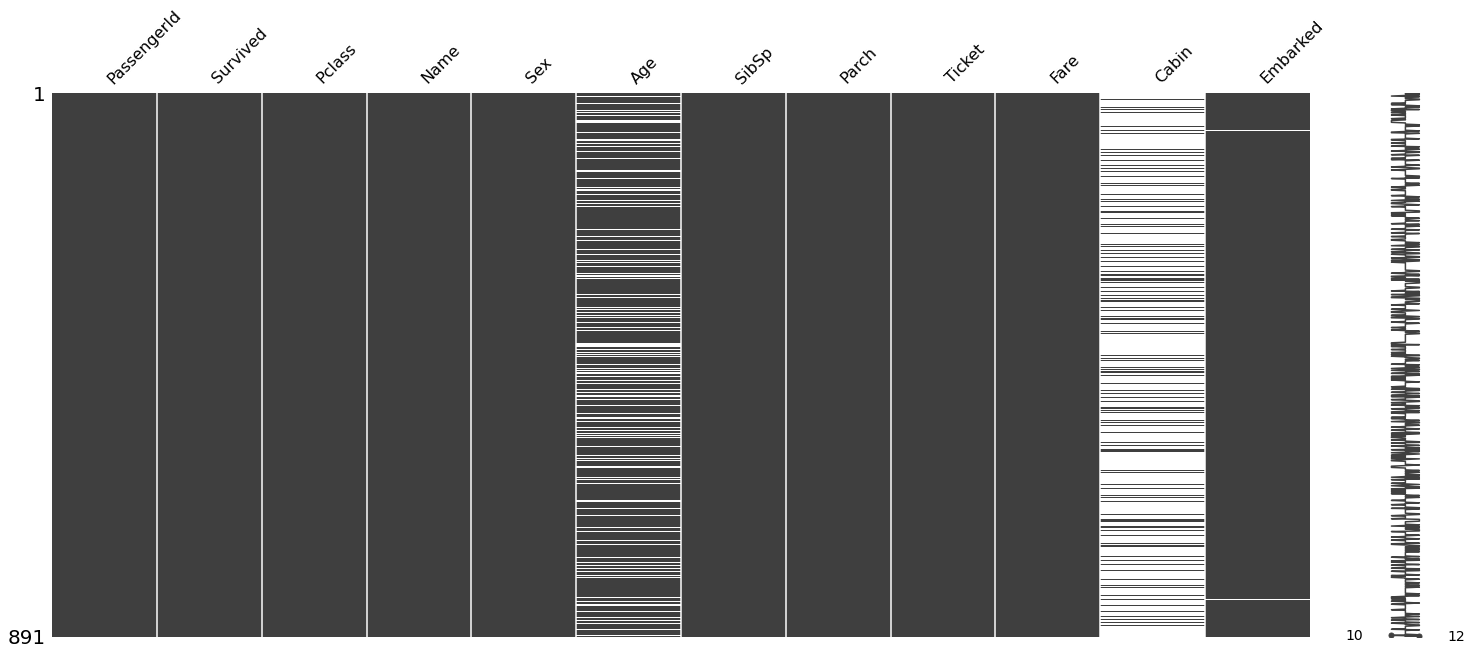

In [ ]:
missingno.matrix(train)

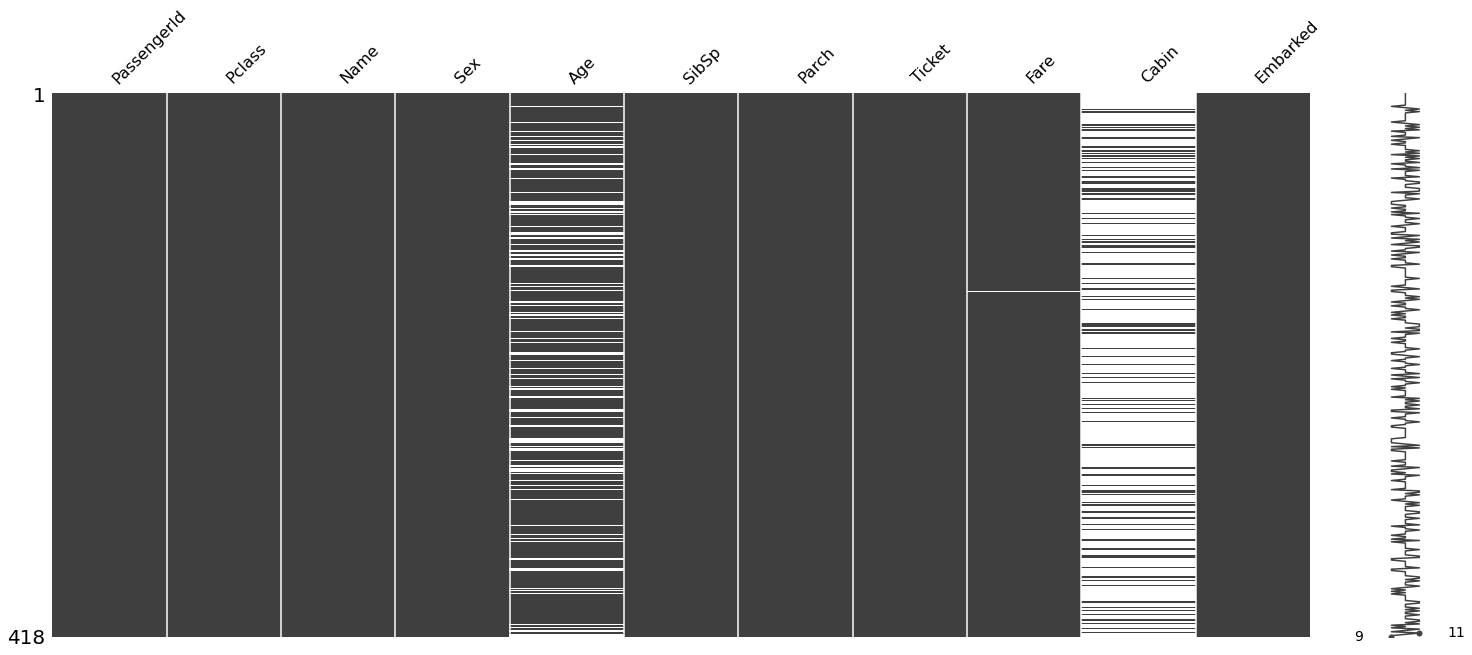

In [ ]:
missingno.matrix(test)

**Feature Analysis**

CATAGORIAL DATA

SEX :


```
# This is formatted as code
```



In [ ]:
# SEX:
train['Sex'].value_counts(dropna=False)


male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train[['Sex','Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 0, 'Survivalprob by gender')

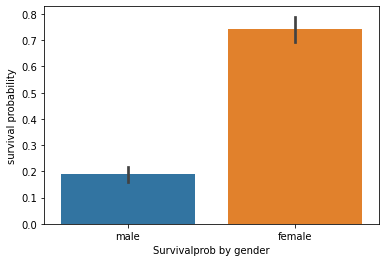

In [ ]:
sns.barplot(x='Sex', y='Survived',data=train)
plt.ylabel('survival probability')
plt.xlabel('Survivalprob by gender')

PCLASS:

In [ ]:
train['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train[['Pclass','Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 0, 'Survivalprob by passenger class')

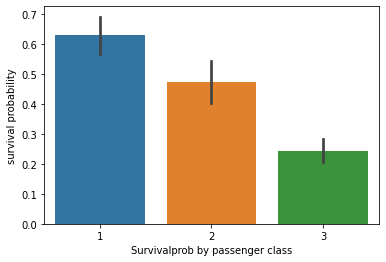

In [ ]:
sns.barplot(x='Pclass', y='Survived',data=train)
plt.ylabel('survival probability')
plt.xlabel('Survivalprob by passenger class')


EMBARKED

In [ ]:
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [ ]:
train[['Embarked','Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 0, 'Survivalprob by point of Embarkation')

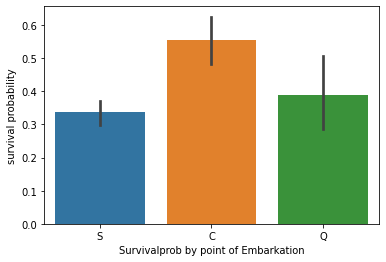

In [ ]:
sns.barplot(x='Embarked', y='Survived',data=train)
plt.ylabel('survival probability')
plt.xlabel('Survivalprob by point of Embarkation')

**Numerical values**

AGE:

In [ ]:
train['Age'].isnull().sum()

177

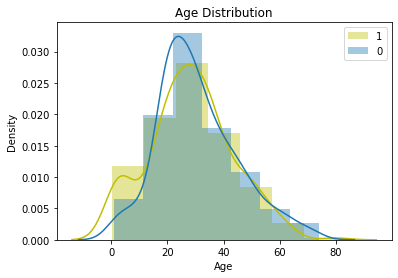

In [ ]:
# Survived by age
sns.distplot(train[train.Survived==1]["Age"],color="y", bins=7, label="1")

# Death by age
sns.distplot(train[train.Survived==0]["Age"], bins=7, label="0")
plt.legend()
plt.title("Age Distribution")
plt.show()

FARE:

In [ ]:
train['Fare'].isnull().sum()

0

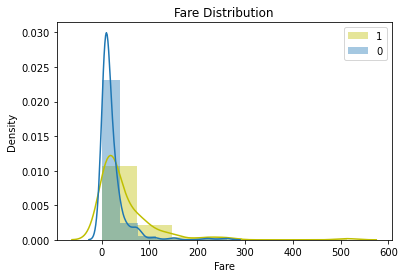

In [ ]:
# Survived by fare
sns.distplot(train[train.Survived==1]["Fare"],color="y", bins=7, label="1")

# Death by fare
sns.distplot(train[train.Survived==0]["Fare"], bins=7, label="0")
plt.legend()
plt.title("Fare Distribution")
plt.show()

SibSp & Parch:

In [ ]:
print(train["SibSp"].value_counts())

print(train["Parch"].value_counts())

train["family_size"] = train["SibSp"] + train["Parch"]

print(train["family_size"].value_counts())

# Proportion of people survived for each class
print(train["Survived"].groupby(train["family_size"]).mean().sort_values(ascending=False))

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_size, dtype: int64
family_size
3     0.724138
2     0.578431
1     0.552795
6     0.333333
0     0.303538
4     0.200000
5     0.136364
10    0.000000
7     0.000000
Name: Survived, dtype: float64


TICKET:

In [ ]:
train["Ticket_first"]=train["Ticket"].apply(lambda x:str(x)[0]) 

print(train["Ticket_first"].value_counts())

#print(train["Ticket_first"]["Survived"].mean().sort_values(ascending=False))
print(train.groupby("Ticket_first")["Survived"].mean().sort_values(ascending=False))

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_first, dtype: int64
Ticket_first
9    1.000000
P    0.646154
1    0.630137
F    0.571429
2    0.464481
C    0.340426
S    0.323077
L    0.250000
3    0.239203
4    0.200000
6    0.166667
W    0.153846
7    0.111111
A    0.068966
8    0.000000
5    0.000000
Name: Survived, dtype: float64


higher surviving rate = F, 1, P , 9

neutral surviving rate = S, C, 2

lower surviving rate  others

CABIN

In [ ]:
train['Cabin'].isnull().sum()

687

In [ ]:
print(train["Cabin"].unique())

# Get the first letters of Cabins
train["Cabin_first"] = train["Cabin"].apply(lambda x: str(x)[0])

# Print value counts of first letters
print(train["Cabin_first"].value_counts())

# Surviving rate of Cabin first letters
print(train.groupby("Cabin_first")["Survived"].mean().sort_values(ascending=False))

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
n    687
C     59
B     47
D     33
E     3

higher surviving rate = D, E, B, F, C

neutralsurviving rate  = G, A

lower surviving rate others

#** Feature Engineering**

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [ ]:
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_embarked = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_age = IterativeImputer(max_iter=100, random_state=34, n_nearest_features=2)

# Impute Embarked
train["Embarked"] = imp_embarked.fit_transform(train[["Embarked"]])
test["Embarked"] = imp_embarked.transform(test[["Embarked"]])

# Impute Age
train["Age"] = np.round(imp_age.fit_transform(train[["Age"]]))
test["Age"] = np.round(imp_age.transform(test[["Age"]]))

Encoding sex column

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize a Label Encoder
le = LabelEncoder()

# Encode Sex
train["Sex"] = le.fit_transform(train[["Sex"]].values.ravel())
test["Sex"] = le.fit_transform(test[["Sex"]].values.ravel())
print(train["sex"])

Including family, ticket, cabin features

In [ ]:
train["Fsize"]=train["SibSp"] + train["Parch"]
test["Fsize"]=test["SibSp"] + test["Parch"]

#tickets
train["Ticket"]=train["Ticket"].apply(lambda x: str(x)[0])
test["Ticket"]=test["Ticket"].apply(lambda x: str(x)[0])

# Cabin first letters
train["Cabin"] = train["Cabin"].apply(lambda x: str(x)[0])
test["Cabin"] = test["Cabin"].apply(lambda x: str(x)[0])

In [ ]:
# Titles
train["Title"] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test["Title"] = test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

Helper function to group categories

In [ ]:
# Group the family_size column
def assign_passenger_label(family_size):
    if family_size == 0:
        return "Alone"
    elif family_size <=3:
        return "Small_family"
    else:
        return "Big_family"
    
# Group the Ticket column
def assign_label_ticket(first):
    if first in ["F", "1", "P", "9"]:
        return "Ticket_high"
    elif first in ["S", "C", "2"]:
        return "Ticket_middle"
    else:
        return "Ticket_low"
    
# Group the Title column    
def assign_label_title(title):
    if title in ["the Countess", "Mlle", "Lady", "Ms", "Sir", "Mme", "Mrs", "Miss", "Master"]:
        return "Title_high"
    elif title in ["Major", "Col", "Dr"]:
        return "Title_middle"
    else:
        return "Title_low"
    
# Group the Cabin column  
def assign_label_cabin(cabin):
    if cabin in ["D", "E", "B", "F", "C"]:
        return "Cabin_high"
    elif cabin in ["G", "A"]:
        return "Cabin_middle"
    else:
        return "Cabin_low"

In [ ]:
train["Fsize"] = train["Fsize"].apply(assign_passenger_label)
test["Fsize"] = test["Fsize"].apply(assign_passenger_label)

# Ticket
train["Ticket"] = train["Ticket"].apply(assign_label_ticket)
test["Ticket"] = test["Ticket"].apply(assign_label_ticket)

# Title
train["Title"] = train["Title"].apply(assign_label_title)
test["Title"] = test["Title"].apply(assign_label_title)

# Cabin
train["Cabin"] = train["Cabin"].apply(assign_label_cabin)
test["Cabin"] = test["Cabin"].apply(assign_label_cabin)

In [ ]:
# One Hot Encoding

train = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Cabin","Title", "Fsize"], data=train, drop_first=True)
test = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Cabin", "Title", "Fsize"], data=test, drop_first=True)

In [ ]:
target = train["Survived"]
train.drop(["Survived", "SibSp", "Parch", "Name", "PassengerId"], axis=1, inplace=True)
test.drop(["SibSp", "Parch", "Name","PassengerId"], axis=1, inplace=True)

Final look

In [ ]:
display(train.head())
display(test.head())

print(train.info())
print(test.info())

,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_Ticket_low,Ticket_Ticket_middle,Cabin_Cabin_low,Cabin_Cabin_middle,Title_Title_low,Title_Title_middle,Fsize_Big_family,Fsize_Small_family
0,1,22.0,7.2500,0,1,0,1,1,0,1,0,1,0,0,1
1,0,38.0,71.2833,0,0,0,0,0,0,0,0,0,0,0,1
2,0,26.0,7.9250,0,1,0,1,0,1,1,0,0,0,0,0
3,0,35.0,53.1000,0,0,0,1,0,0,0,0,0,0,0,1
4,1,35.0,8.0500,0,1,0,1,1,0,1,0,1,0,0,0


,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_Ticket_low,Ticket_Ticket_middle,Cabin_Cabin_low,Cabin_Cabin_middle,Title_Title_low,Title_Title_middle,Fsize_Big_family,Fsize_Small_family
0,1,34.0,7.8292,0,1,1,0,1,0,1,0,1,0,0,0
1,0,47.0,7.0000,0,1,0,1,1,0,1,0,0,0,0,1
2,1,62.0,9.6875,1,0,1,0,0,1,1,0,1,0,0,0
3,1,27.0,8.6625,0,1,0,1,1,0,1,0,1,0,0,0
4,0,22.0,12.2875,0,1,0,1,1,0,1,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   891 non-null    int64  
 1   Age                   891 non-null    float64
 2   Fare                  891 non-null    float64
 3   Pclass_2              891 non-null    uint8  
 4   Pclass_3              891 non-null    uint8  
 5   Embarked_Q            891 non-null    uint8  
 6   Embarked_S            891 non-null    uint8  
 7   Ticket_Ticket_low     891 non-null    uint8  
 8   Ticket_Ticket_middle  891 non-null    uint8  
 9   Cabin_Cabin_low       891 non-null    uint8  
 10  Cabin_Cabin_middle    891 non-null    uint8  
 11  Title_Title_low       891 non-null    uint8  
 12  Title_Title_middle    891 non-null    uint8  
 13  Fsize_Big_family      891 non-null    uint8  
 14  Fsize_Small_family    891 non-null    uint8  
dtypes: float64(2), int64(1)

# **Machine Learning**

In [1]:
from sklearn.model_selection import train_test_split

# Select the features and the target
X = train.values
y = target.values

# Split the data info training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

rf=RandomForestClassifier(random_state=34)

params = {'n_estimators': [50, 100, 200, 300, 350],
          'max_depth': [3,4,5,7, 10,15,20],
          'criterion':['entropy', 'gini'],
          'min_samples_leaf' : [1, 2, 3, 4, 5, 10],
          'max_features':['auto'],
          'min_samples_split': [3, 5, 10, 15, 20],
          'max_leaf_nodes':[2,3,4,5],
          }

clf = GridSearchCV(estimator=rf,param_grid=params,cv=10, n_jobs=-1)

clf.fit(X_train, y_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

rf_best = clf.best_estimator_

# Predict from the test set
y_pred = clf.predict(X_test)

# Print the accuracy with accuracy_score function
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Create a pandas series with feature importances
importance = pd.Series(rf_best.feature_importances_,index=train.columns).sort_values(ascending=False)

sns.barplot(x=importance, y=importance.index)
# Add labels to your graph
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Important Features")
plt.show()

Training over entire data

In [ ]:
last_clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=True, random_state=34, verbose=0,
                       warm_start=False)

last_clf.fit(train, target)
print("%.4f" % last_clf.oob_score_)

Prepare submission file

In [ ]:
# Store passenger ids
ids = pd.read_csv("test.csv")[["PassengerId"]].values

# Make predictions
predictions = last_clf.predict(test.values)

# Print the predictions
print(predictions)

# Create a dictionary with passenger ids and predictions
df = {'PassengerId': ids.ravel(), 'Survived':predictions}

# Create a DataFrame named submission
submission = pd.DataFrame(df)

# Display the first five rows of submission
display(submission.head())

# Save the file
submission.to_csv("submission_last.csv", index=False)